# Spam Classification

In [104]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import string
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

**Reading Data**

In [105]:
data=pd.read_csv('Text_HAM_SPAM_calssification.csv')

In [106]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Your gonna have to pick up a $1 burger for you...


** Analyzing data**

In [107]:
data.shape

(5026, 2)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026 entries, 0 to 5025
Data columns (total 2 columns):
Category    1726 non-null object
Message     1791 non-null object
dtypes: object(2)
memory usage: 78.7+ KB


In [109]:
data.isnull().sum()

Category    3300
Message     3235
dtype: int64

In [110]:
data[data['Category'].isnull()]

,Category,Message
1000,NaN,I'm at work. Please call
1001,NaN,Then u drive lor.
1002,NaN,Ard 515 like dat. Y?
1003,NaN,Tell me they're female :V how're you throwing ...
1004,NaN,EASTENDERS TV Quiz. What FLOWER does DOT compa...
...,...,...
5021,NaN,NaN
5022,NaN,NaN
5023,NaN,NaN
5024,NaN,NaN


In [111]:
len(data[data['Message'].isnull()])

3235

In [112]:
# dropping rows with null values

data_clean=data.dropna()

In [113]:
data_clean.shape

(1726, 2)

In [114]:
data_clean.isnull().sum()

Category    0
Message     0
dtype: int64

In [115]:
#data_clean.head()

In [116]:
data_clean.Category.value_counts()

ham     1490
spam     236
Name: Category, dtype: int64

Percentage of classes

ham     86.33
spam    13.67
Name: Category, dtype: float64


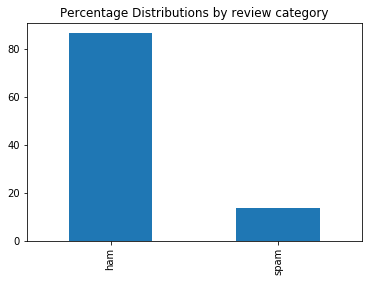

In [117]:
print('Percentage of classes\n')
print(round(data_clean.Category.value_counts(normalize=True)*100,2))
round(data_clean.Category.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review category')
plt.show()

In [118]:
data_clean.describe().transpose()

,count,unique,top,freq
Category,1726,2,ham,1490
Message,1726,1667,"Sorry, I'll call later",10


In [119]:
data_clean.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Your gonna have to pick up a $1 burger for you...


In [120]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1790
Data columns (total 2 columns):
Category    1726 non-null object
Message     1726 non-null object
dtypes: object(2)
memory usage: 40.5+ KB


In [121]:
print (string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


**Removing Stop words and punctuations**

In [122]:
def clean_Data(text):
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"wasn't", "do not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\'t", " not", text)
    
    text=str(text).lower()
    
    p=set(string.punctuation)
    for i in range(10):
        p.add(str(i))
        
    words=text.split()
    text=[]
    for word in words:
        text_word=''.join(i for i in word if i not in p)
        text.append(text_word)
    return ' '.join(text)

In [123]:
from nltk.corpus import stopwords

stop=set(stopwords.words('english'))

clean_doc=[]
for doc in data_clean['Message'].values:
    clean_text=clean_Data(doc)
    if len(clean_text)!=0:
        clean_doc.append(clean_text)
    else:
        clean_doc.append('NAN')
    
data_clean['Cleaned_data']=clean_doc

In [124]:
data_clean.shape

(1726, 3)

In [125]:
data_clean[data_clean['Cleaned_data']=='NAN'].count()

Category        1
Message         1
Cleaned_data    1
dtype: int64

In [126]:
data_clean[data_clean['Cleaned_data']=='NAN']

,Category,Message,Cleaned_data
1556,ham,645,NAN


In [127]:
data_clean.drop(data_clean[data_clean["Cleaned_data"]=='NAN'].index,axis = 0,inplace = True) # deleting rows that have no text 
data_clean=data_clean.reset_index(drop='true') # after deleting rows index should be reset
data_clean['Category']= data_clean['Category'].replace('ham',0)
data_clean['Category']= data_clean['Category'].replace('spam',1)

In [128]:
data_clean[data_clean['Category']==1]

,Category,Message,Cleaned_data
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
9,1,"As a valued customer, I am pleased to advise y...",as a valued customer i am pleased to advise yo...
11,1,Urgent UR awarded a complimentary trip to Euro...,urgent ur awarded a complimentary trip to euro...
12,1,"Did you hear about the new ""Divorce Barbie""? I...",did you hear about the new divorce barbie it c...
37,1,Please call our customer service representativ...,please call our customer service representativ...
...,...,...,...
1659,1,BIG BROTHER ALERT! The computer has selected u...,big brother alert the computer has selected u ...
1671,1,WIN: We have a winner! Mr. T. Foley won an iPo...,win we have a winner mr t foley won an ipod mo...
1685,1,Todays Voda numbers ending 1225 are selected t...,todays voda numbers ending are selected to re...
1708,1,Hottest pics straight to your phone!! See me g...,hottest pics straight to your phone see me get...


In [129]:
data_clean[data_clean['Cleaned_data']=='NAN'].count()

Category        0
Message         0
Cleaned_data    0
dtype: int64

In [130]:
data_clean.shape

(1725, 3)

**Stemming**

In [131]:
from nltk.stem.snowball import SnowballStemmer

s=SnowballStemmer("english")

clean_doc1=[]
for sent in data_clean['Cleaned_data'].values:
    d=' '.join(s.stem(word) for word in sent.split())
    clean_doc1.append(d)

data_clean['Cleaned_data1']=clean_doc1   

In [132]:
data_clean.head()

,Category,Message,Cleaned_data,Cleaned_data1
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...,free entri in a wkli comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so earli hor u c alreadi then say
4,0,Your gonna have to pick up a $1 burger for you...,your gonna have to pick up a burger for yours...,your gonna have to pick up a burger for yourse...


In [133]:
data_clean.Category.unique()

array([0, 1], dtype=int64)

In [134]:
data_clean.rename({'Cleaned_data1':'Cleaned_data_new'},axis=1, inplace=True)

In [135]:
data_clean.head()

,Category,Message,Cleaned_data,Cleaned_data_new
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...,free entri in a wkli comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so earli hor u c alreadi then say
4,0,Your gonna have to pick up a $1 burger for you...,your gonna have to pick up a burger for yours...,your gonna have to pick up a burger for yourse...


In [136]:
Length=data_clean['Message'].apply(len)


In [137]:
data_clean.head()

,Category,Message,Cleaned_data,Cleaned_data_new
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...,free entri in a wkli comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so earli hor u c alreadi then say
4,0,Your gonna have to pick up a $1 burger for you...,your gonna have to pick up a burger for yours...,your gonna have to pick up a burger for yourse...


In [138]:
df=data_clean['Cleaned_data_new']
y=data_clean['Category']

In [139]:
df.head()

0    go until jurong point crazi avail onli in bugi...
1                                ok lar joke wif u oni
2    free entri in a wkli comp to win fa cup final ...
3          u dun say so earli hor u c alreadi then say
4    your gonna have to pick up a burger for yourse...
Name: Cleaned_data_new, dtype: object

**Train_Test_Split for Model training**

In [140]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 225)

print (X_train.shape)
print (y_train.shape)

print (X_test.shape)
print(y_test.shape)

(1380,)
(1380,)
(345,)
(345,)


** Bag of Words**

In [141]:
#from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

#converting sentences to Bag of words
X=cv.fit_transform(X_train)
print (X.shape)

(1380, 3365)


In [142]:
X=cv.fit(df)
X.vocabulary_['bonus']  # vocabulary and their frequencies
#X.get_feature_names()

382

In [143]:
X=cv.fit_transform(X_train).toarray()

print (X.shape)

(1380, 3365)


In [144]:
Input_train=pd.DataFrame(X, columns=cv.get_feature_names())

print (Input_train.shape)

(1380, 3365)


**Data Modelling**

In [145]:
#X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.2, random_state = 225)

from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB().fit(Input_train,y_train)  ## training the model with default parameters- Alpha=1.0

y_pred=model.predict(Input_train)

Train confusion matrix


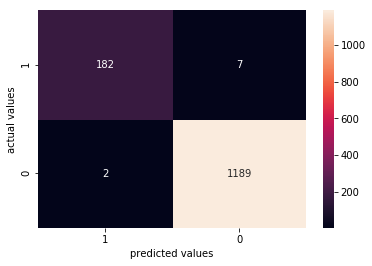

In [146]:
#confusion_matrix(y_train, y_pred)
y_pred=model.predict(Input_train)

print("Train confusion matrix")
cm = sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt='d')
cm.set_ylim([0,2])
cm.set_xlim([2,0])
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()

In [147]:
print (classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      1191
          1       0.99      0.96      0.98       189

avg / total       0.99      0.99      0.99      1380



**Predictions on test data**

In [148]:
X_tst=cv.transform(X_test).toarray()

#print (X_tst.shape)
y_test_pred=model.predict(X_tst)

Test confusion matrix


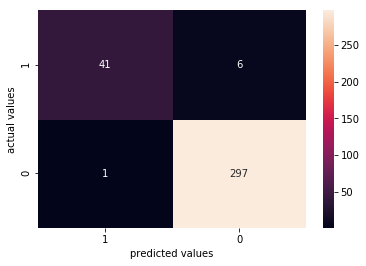

In [149]:
print("Test confusion matrix")
cm = sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True,fmt='d')
cm.set_ylim([0,2])
cm.set_xlim([2,0])
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()

#confusion_matrix(y_test, y_test_pred)

In [150]:
print (classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       298
          1       0.98      0.87      0.92        47

avg / total       0.98      0.98      0.98       345



**ROC-AUC Curve**

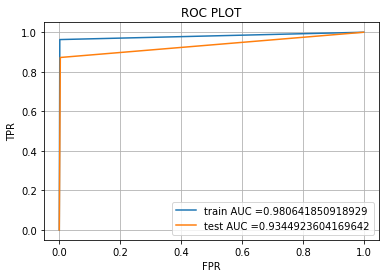

In [151]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
plt.grid()
plt.show()

**Observtions:**
    
Metric : Auc-Score , F1- Score
    
Train data: 0.98 ,    0.98 

Test data: 0.93 ,     0.92

we can validate these results with Gridsearch and can further find best parameters

**GridSearch & Hyperparameter Tuning**

In [152]:
import math
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [153]:
neigh = MultinomialNB(fit_prior='false')#Taking Model Multinomial Naive Bayes

alphas=np.array([0.001,0.01,0.1,1,10]) # Different alpha values
tuned_parameters = {'alpha' : alphas} # alpha values in a dictionary


clf = GridSearchCV(neigh, tuned_parameters, cv=5, scoring='roc_auc',return_train_score='true') 
clf.fit(Input_train,y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)

results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']

cv_auc = results['mean_test_score'] 

k =  results['param_alpha']

In [154]:
results_df=pd.DataFrame(list(zip(k, train_auc, cv_auc)), columns=['Alpha','Train_Auc', 'Test_Auc'])

print ("Experiments & Results")
results_df

Experiments & Results


,Alpha,Train_Auc,Test_Auc
0,0.001,0.999994,0.976890
1,0.010,0.999993,0.983560
2,0.100,0.999985,0.987149
3,1.000,0.997273,0.975821
4,10.000,0.894481,0.848767


In [155]:
# alpha value is taken as log alpha value
alpha1=[]
for i in range(0,len(k),1):
   l=math.log10(k[i])
   alpha1.append(l)
alpha1.sort()
#print(alpha1)

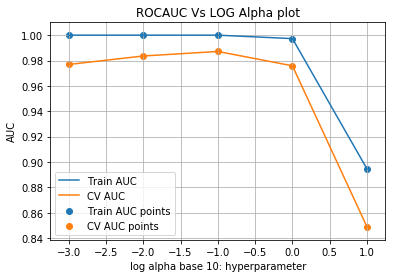

In [156]:
plt.plot(alpha1, train_auc, label='Train AUC')# to connect lines to auc points
plt.plot(alpha1, cv_auc, label='CV AUC')
plt.scatter(alpha1, train_auc, label='Train AUC points')
plt.scatter(alpha1, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha base 10: hyperparameter")
plt.ylabel("AUC")
plt.title("ROCAUC Vs LOG Alpha plot")
plt.grid()
plt.show()

**Observations:**

Hyperparameter tuning - trained the model by changing alpha values and compared the AUC- score

With Alpha=0.1,  model performed well (neither overfitting nor underfitting) on both training and testing data when compared with other Alpha values

Therefore,  considering the best alpha value (0.1) for model training


In [157]:
# pick the best alpha value
print(clf.best_params_)
print('Auc Score:', clf.best_score_)
print("best alpha log value: ", math.log10(clf.best_params_.get('alpha')))

{'alpha': 0.1}
Auc Score: 0.9871488887660599
best alpha log value:  -1.0


** Training the model with best alpha value**

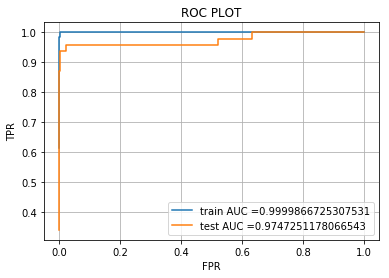

In [158]:

#X_train, X_test, y_train, y_test
neigh = MultinomialNB(alpha=0.1)
neigh.fit(Input_train,y_train)

y_train_pred = neigh.predict_proba(Input_train)[:,1]  
y_test_pred = neigh.predict_proba(X_tst)[:,1]
#print(y_test_pred)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
plt.grid()
plt.show()


Train confusion matrix


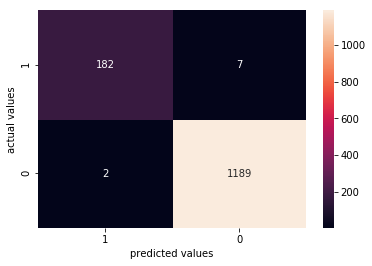

In [160]:
# Metrics on training data

print("Train confusion matrix")

y_train_pred=model.predict(Input_train)

cm = sns.heatmap(confusion_matrix(y_train, y_train_pred),annot=True,fmt='d')
cm.set_ylim([0,2])
cm.set_xlim([2,0])
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()

In [161]:
print (classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      1191
          1       0.99      0.96      0.98       189

avg / total       0.99      0.99      0.99      1380



**Predictions on test data**

Test confusion matrix


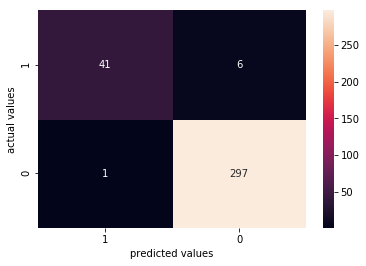

In [163]:
y_test_pred=model.predict(X_tst)

print("Test confusion matrix")
cm = sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True,fmt='d')
cm.set_ylim([0,2])
cm.set_xlim([2,0])
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()

#confusion_matrix(y_test, y_test_pred)

In [164]:
print (classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       298
          1       0.98      0.87      0.92        47

avg / total       0.98      0.98      0.98       345



** Conclusions: **

Metrics : Auc, F1- Score

F1-Score is same when trained the model with  Alpha values (Alpha=1 , 0.1) for positive class
    
Observerd difference in AUC score.Performance is better for Alpha=0.1 when comapred to Alpha=1.

KPI : AUC score

Model Summary:

Precision: 0.99
Recall: 0.96
F1-Score : 0.98
Auc- Score: 0.99